# Code to be added to utils

## general utils

In [ ]:
def remove_cats(adata):

    cat_columns = adata.obs.select_dtypes(['category']).columns
    adata.obs[cat_columns] = adata.obs[cat_columns].astype(str)
    
    return adata

## plotting utils

In [135]:
def tiss_cell_fractions(adata,
                        technology_col='method',
                        groupby='tissue',
                        category='cell_ontology_class',
                        dataset="Pilot2"):
    
    if technology_col:
        adata = adata[adata.obs[technology_col]=='10X'].copy()
    
    for t in list(set(adata.obs[groupby])):
        print(t)
        tiss = adata[adata.obs[groupby] == t].copy()
        
        aux = tiss.obs.groupby([category]).count()
        aux = pd.DataFrame(aux).reset_index()
        aux['sample'] = aux[aux.columns[1]]/aux[aux.columns[1]].sum()

        f, ax = plt.subplots(figsize=(15,10)) 
        g = sns.barplot(data = aux, y = 'sample',x = category, ax = ax)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
        ax.set(xlabel= dataset +" "+ t +' cell types', ylabel='Relative abundance in 10X data');
        plt.tight_layout()
        plt.savefig("./cell_fractions/"+save+"_"+t+'.pdf')

# Setup

In [76]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read data

In [108]:
adata12 = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/Pilot12.all.v0.h5ad")
adata12

AnnData object with n_obs × n_vars = 189769 × 19070 
    obs: 'Manual Annotation Round 2', 'Manual Annotation Round 2 Ontology Terms', 'Tissue Tech', 'filter_cells_min_counts', 'filter_cells_min_genes', 'n_counts', 'n_genes', 'notes', 'phase', 'pilot', 'replicate', 'sample', 'scANVI Prediction By Organ', 'subtissue', 'tissue', 'pred', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'sequencer', 'propagated_annotation', 'manual_annotation'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'n_cells-0-1', 'n_cells-1-1', 'n_cells-1'
    uns: 'neighbors'
    obsm: 'X_scvi', 'X_umap'

In [110]:
adata12.obs['method'] = [t.rsplit("_",1)[1] for t in adata12.obs['Tissue Tech']]
adata12.obs.loc[adata12.obs[adata12.obs['method']=='pilot2'].index,'method']= '10x'

In [112]:
adata12.obs = adata12.obs.replace({'10x':'10X'})

In [113]:
adata12 = remove_cats(adata12)
adata12.obs.loc[adata12.obs[adata12.obs['pilot']=='nan'].index,'pilot']= 'TSP1'

In [114]:
adata12 = adata12[adata12.obs['pilot']=='TSP1']
adata12

View of AnnData object with n_obs × n_vars = 41723 × 19070 
    obs: 'Manual Annotation Round 2', 'Manual Annotation Round 2 Ontology Terms', 'Tissue Tech', 'filter_cells_min_counts', 'filter_cells_min_genes', 'n_counts', 'n_genes', 'notes', 'phase', 'pilot', 'replicate', 'sample', 'scANVI Prediction By Organ', 'subtissue', 'tissue', 'pred', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'sequencer', 'propagated_annotation', 'manual_annotation', 'method'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'n_cells-0-1', 'n_cells-1-1', 'n_cells-1'
    uns: 'neighbors'
    obsm: 'X_scvi', 'X_umap'

In [46]:
adata2 = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/Pilot2.cellontology.h5ad")
adata2

AnnData object with n_obs × n_vars = 272445 × 58870 
    obs: 'manual_annotation', 'propagated_annotation', '10X_run', 'method', 'n_counts', 'n_genes', 'notes', 'pilot', 'replicate', 'sample', 'sequencer', 'subtissue', 'tissue', 'sex', 'Tissue Tech', 'batch', 'cell_ontology_class'
    var: 'gene_ids', 'feature_types'
    uns: 'neighbors'
    obsm: 'X_scvi', 'X_umap'

In [115]:
tsp1 = remove_cats(adata12)
tsp2 = remove_cats(adata2)

Trying to set attribute `.obs` of view, copying.


# Generate figures -- to be replaced by function

Muscle
Bladder
Pancreas
Blood
Lung
Vasculature
BM
LI
Fat
Heart
Muscle
LymphNode
Trachea
Spleen
SI
Bladder
Kidney
Thymus
Blood
Lung


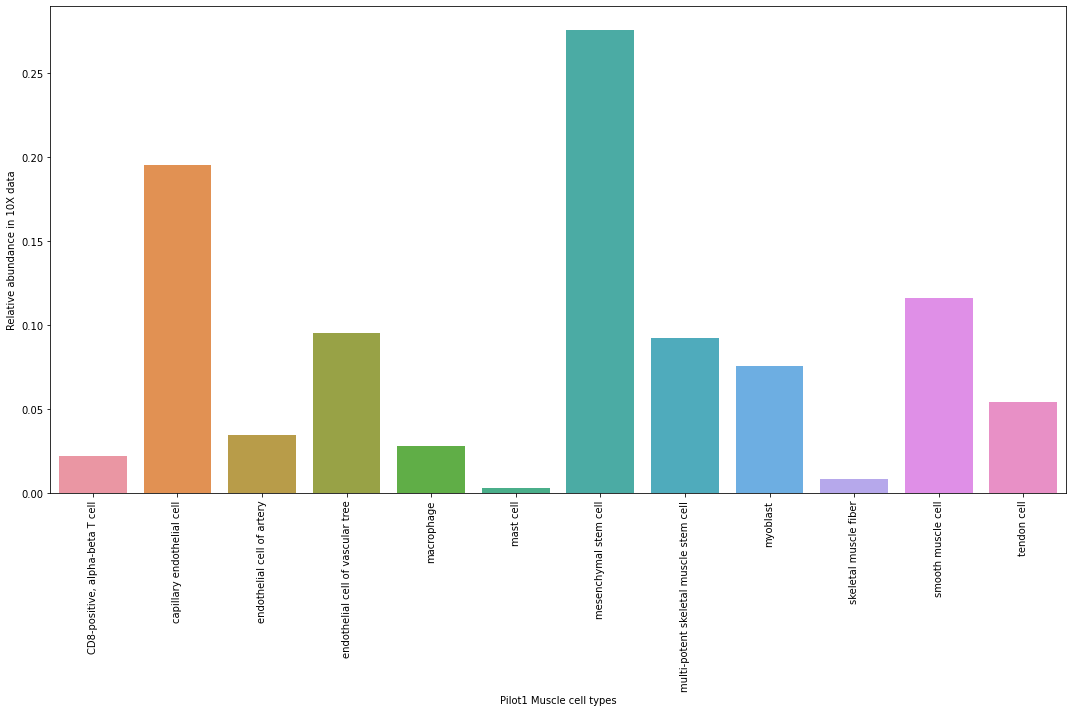

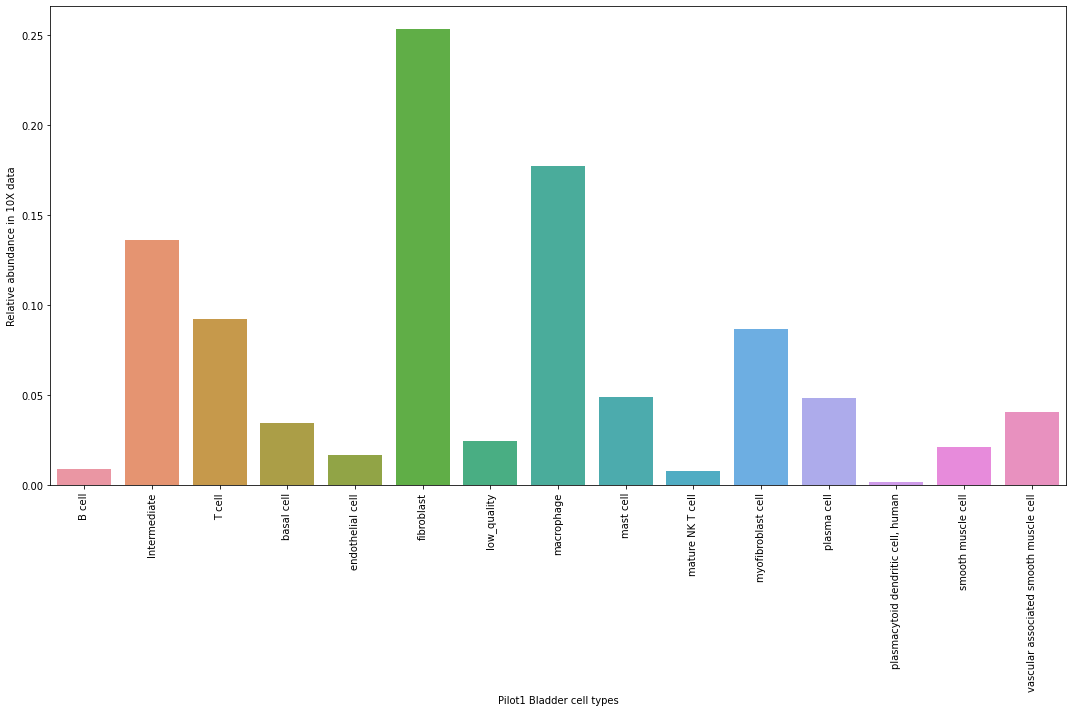

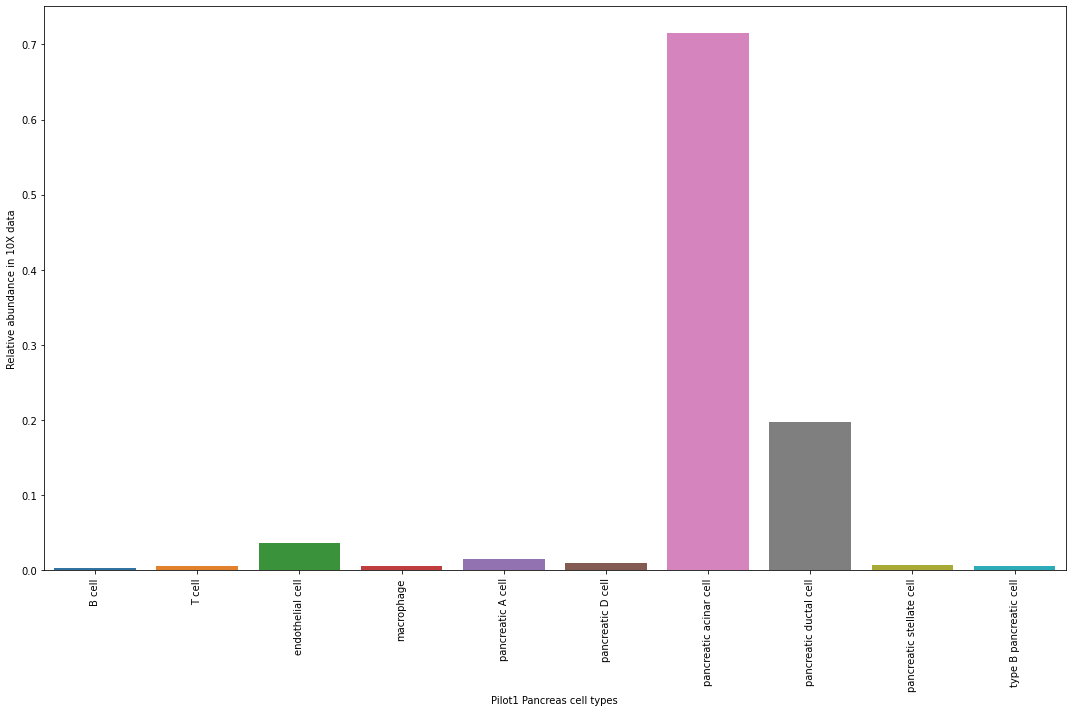

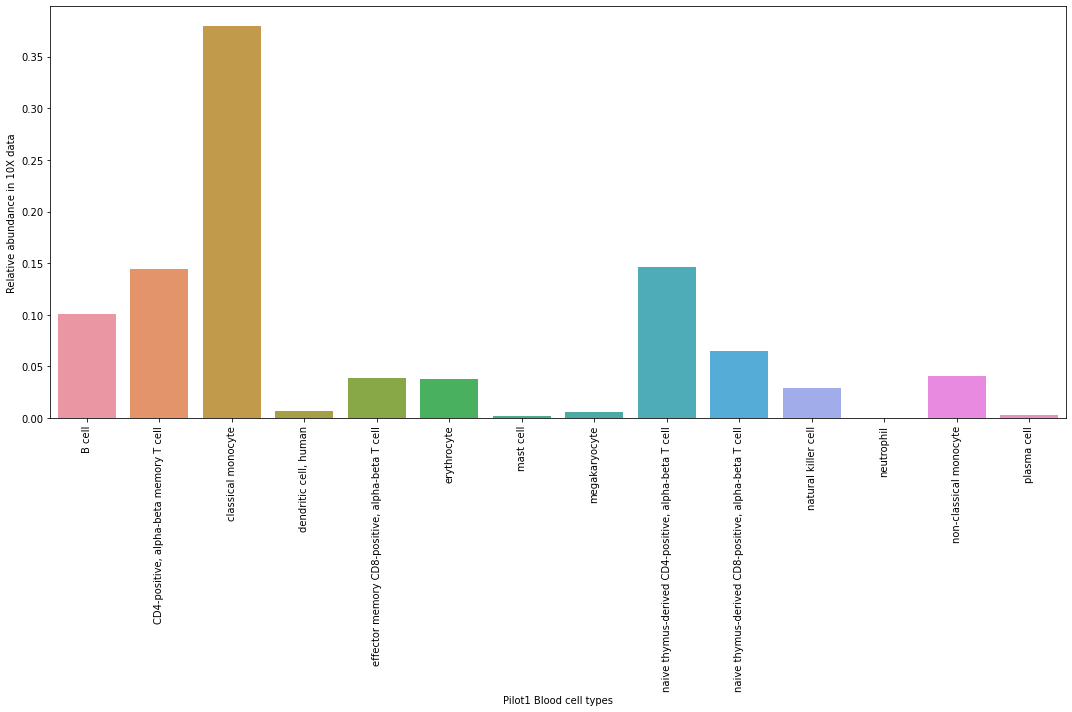

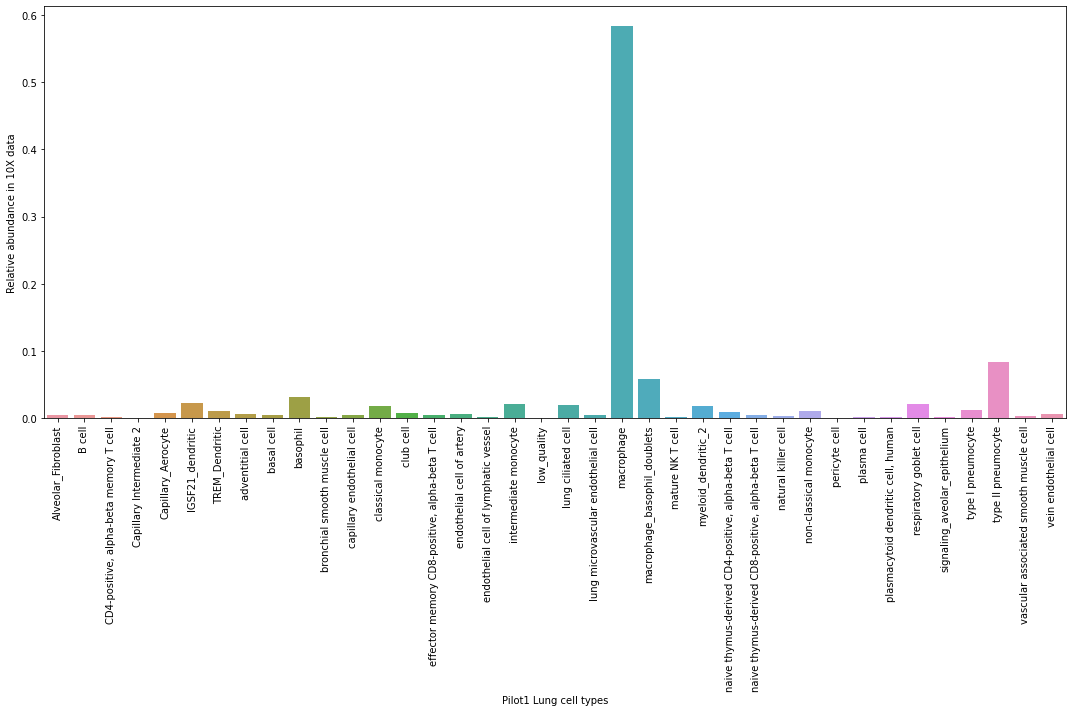

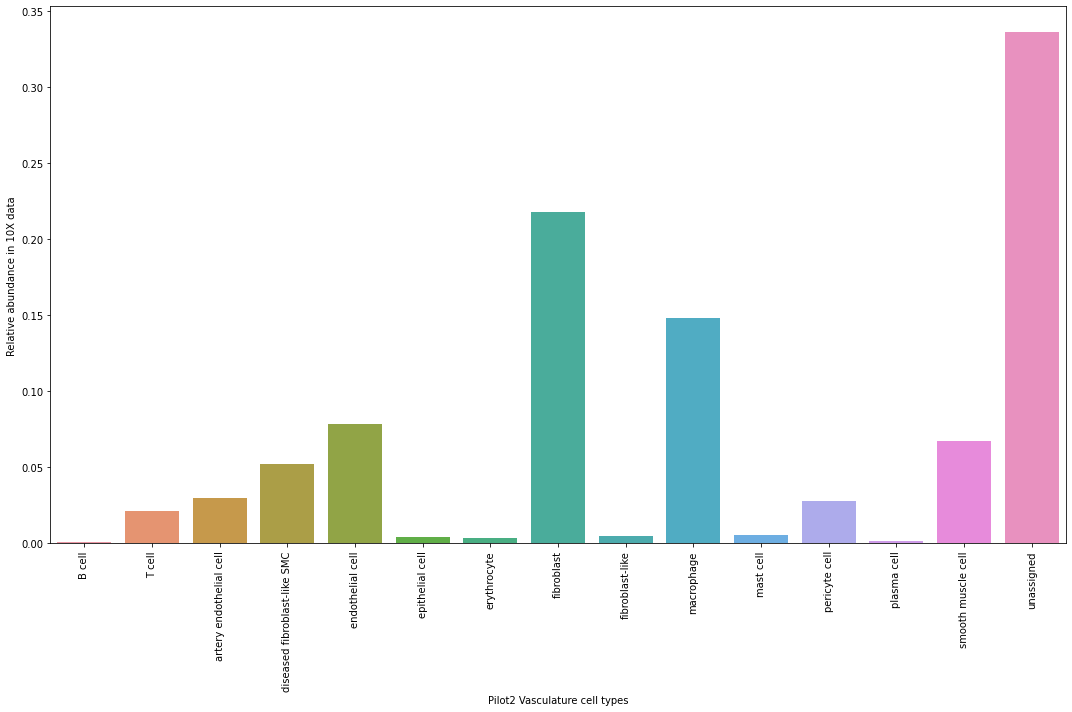

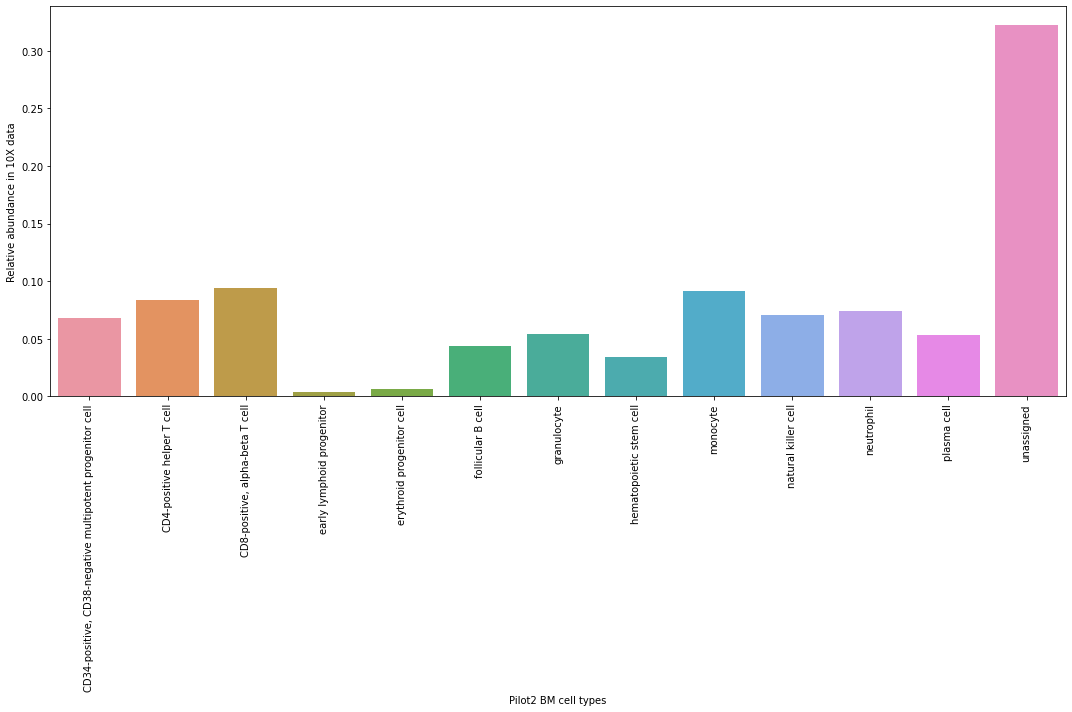

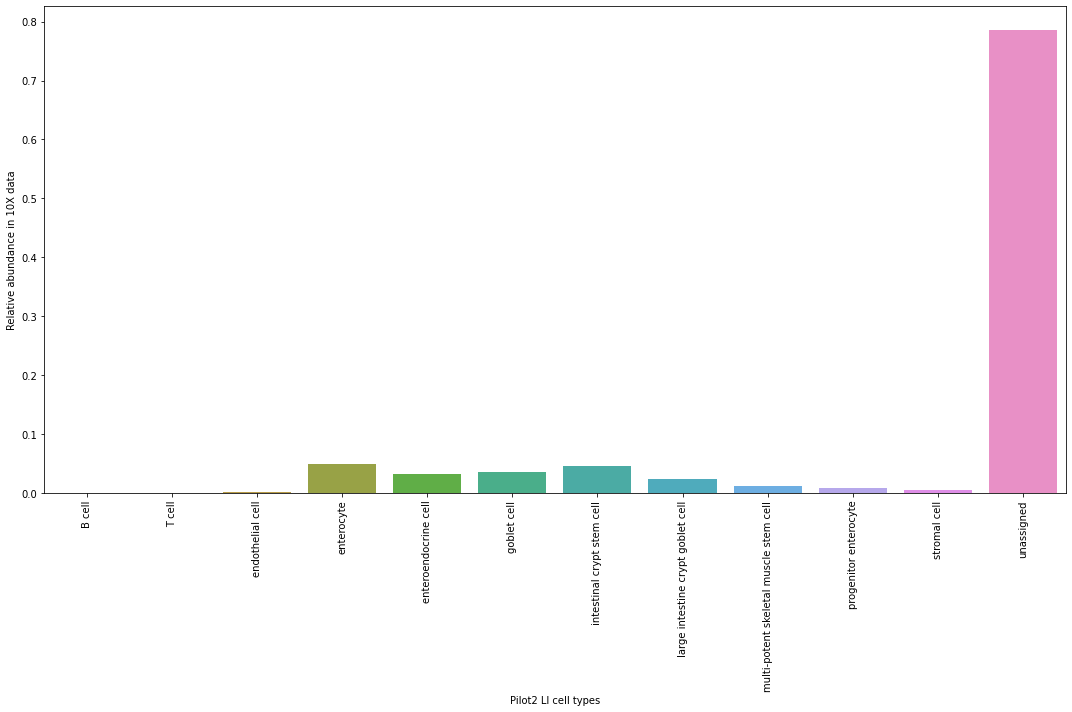

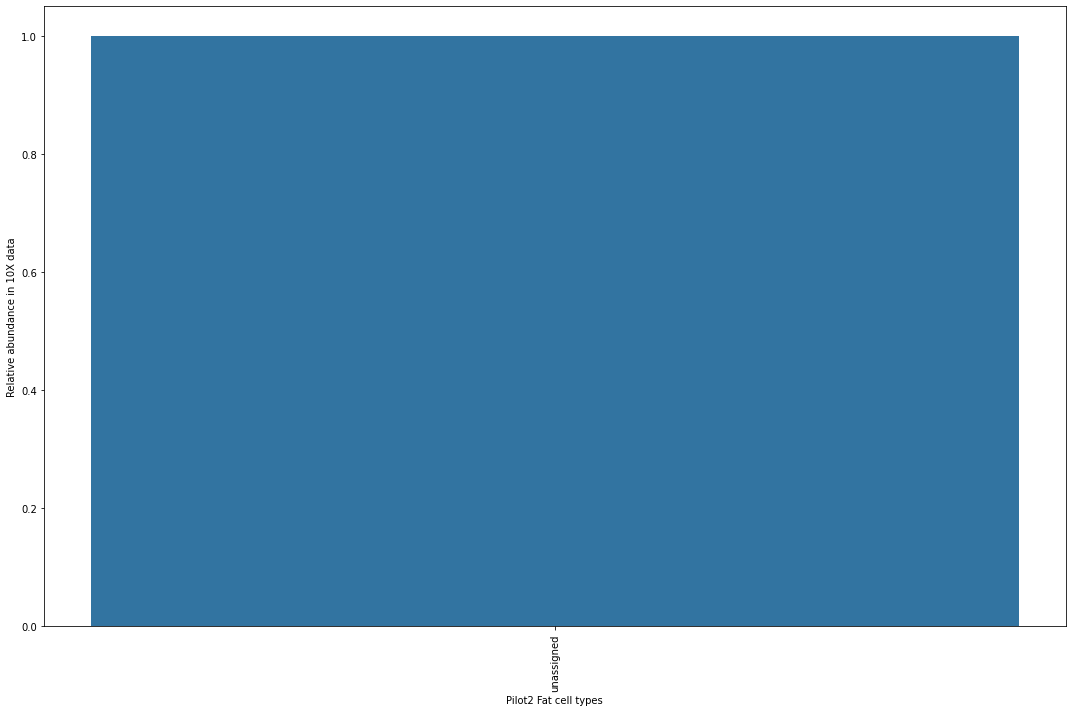

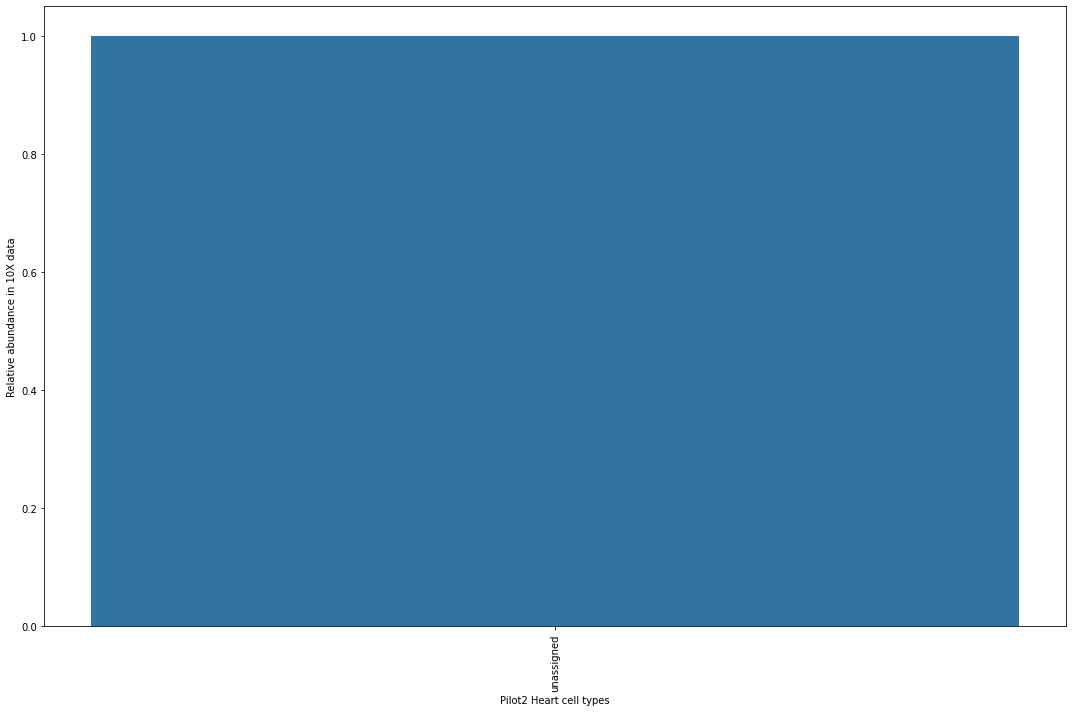

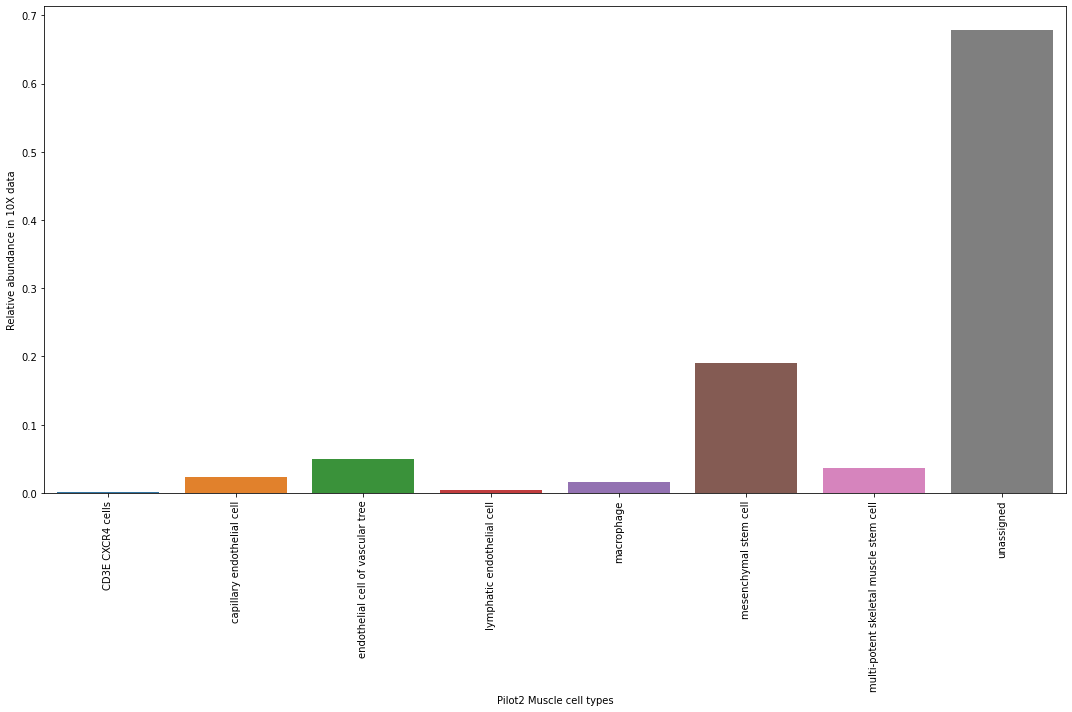

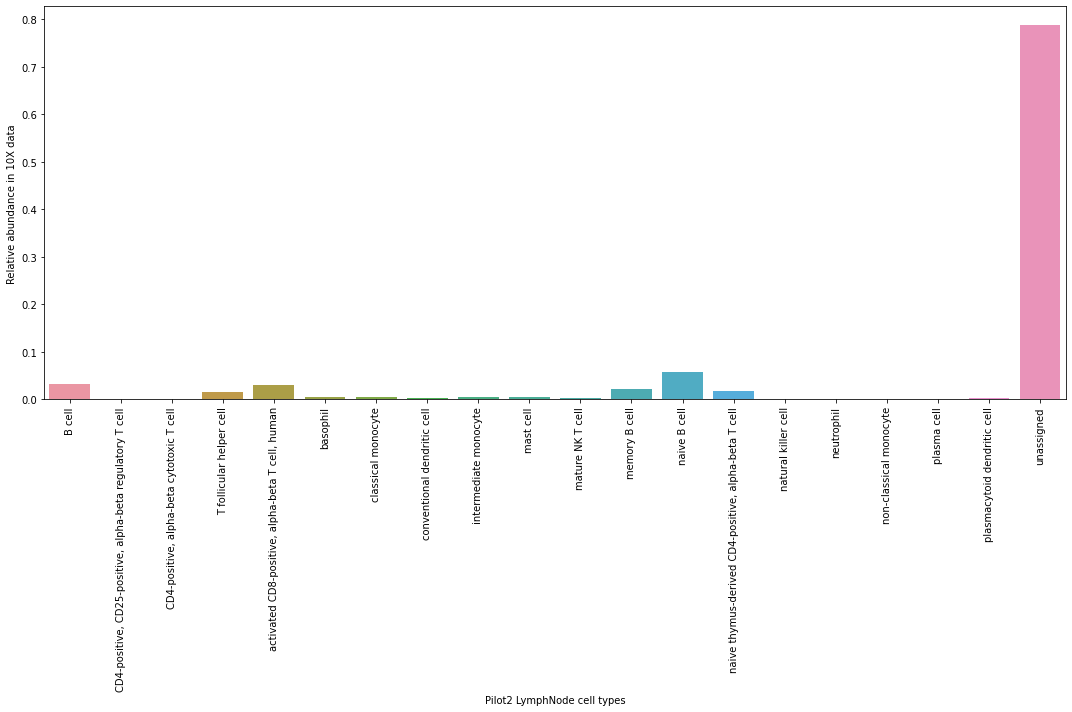

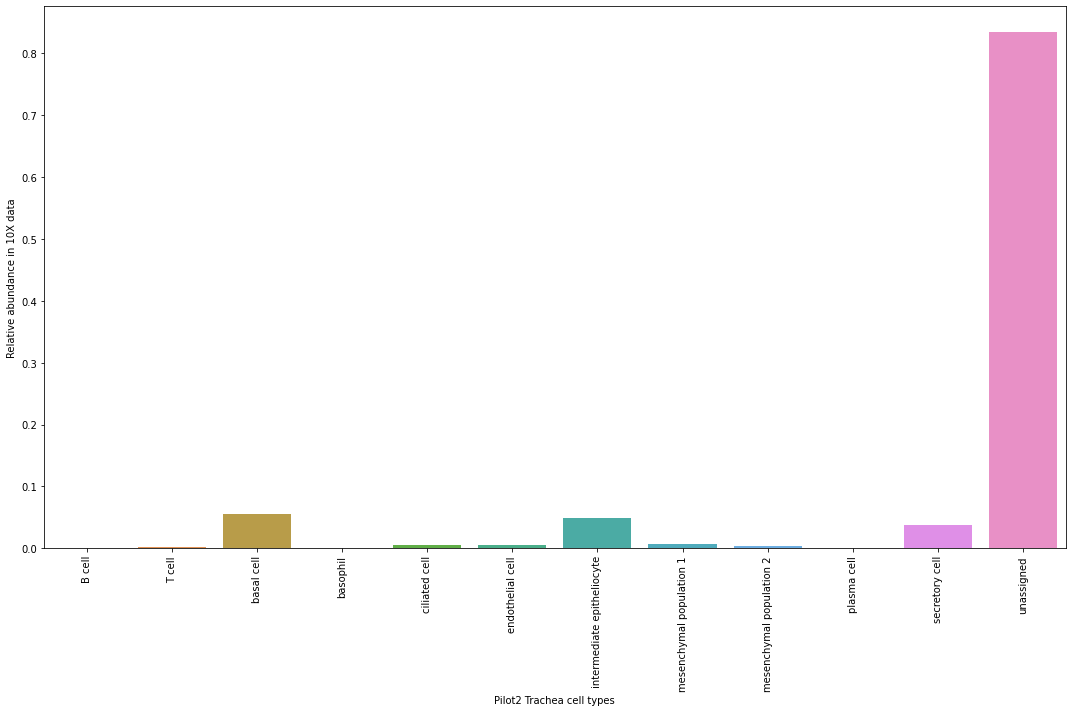

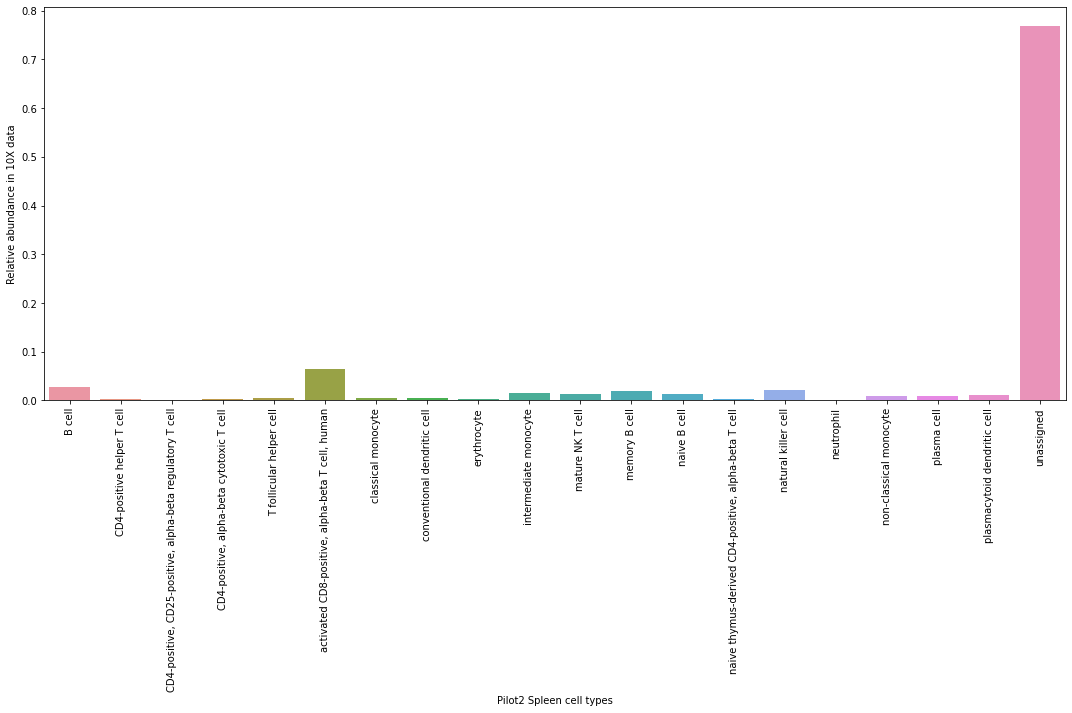

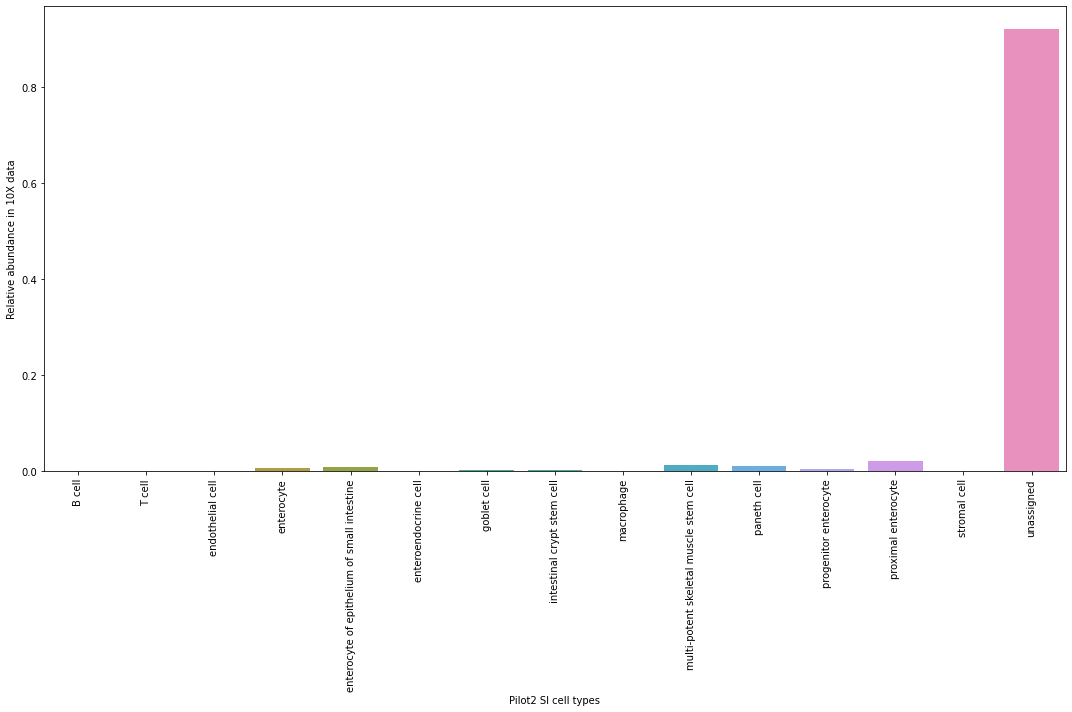

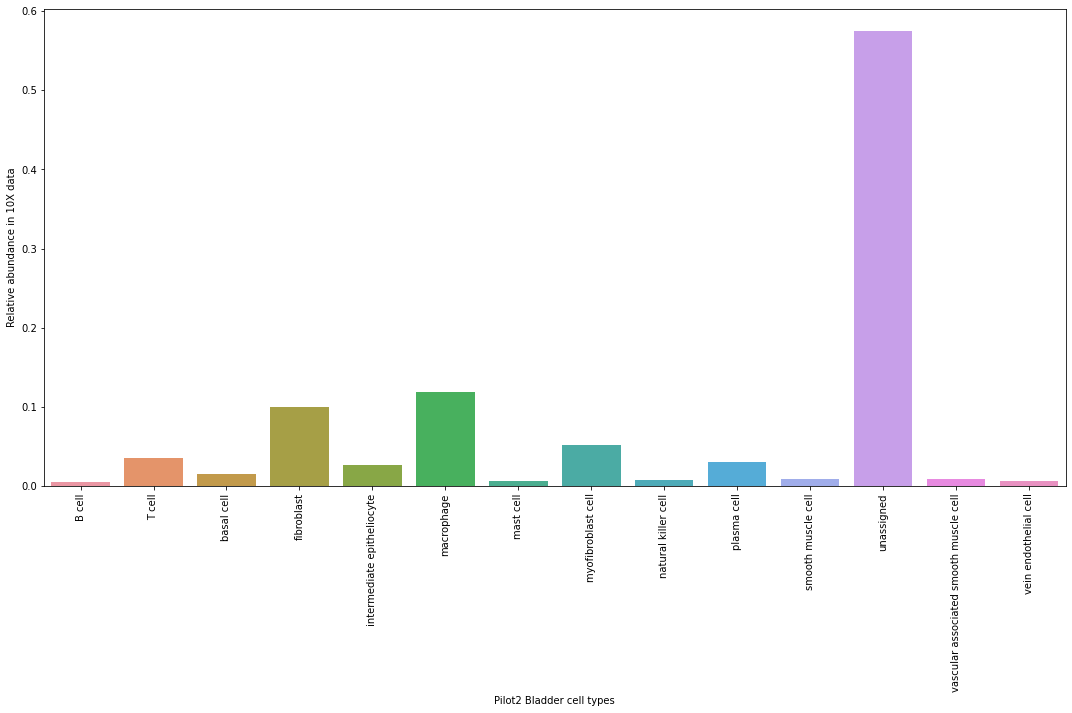

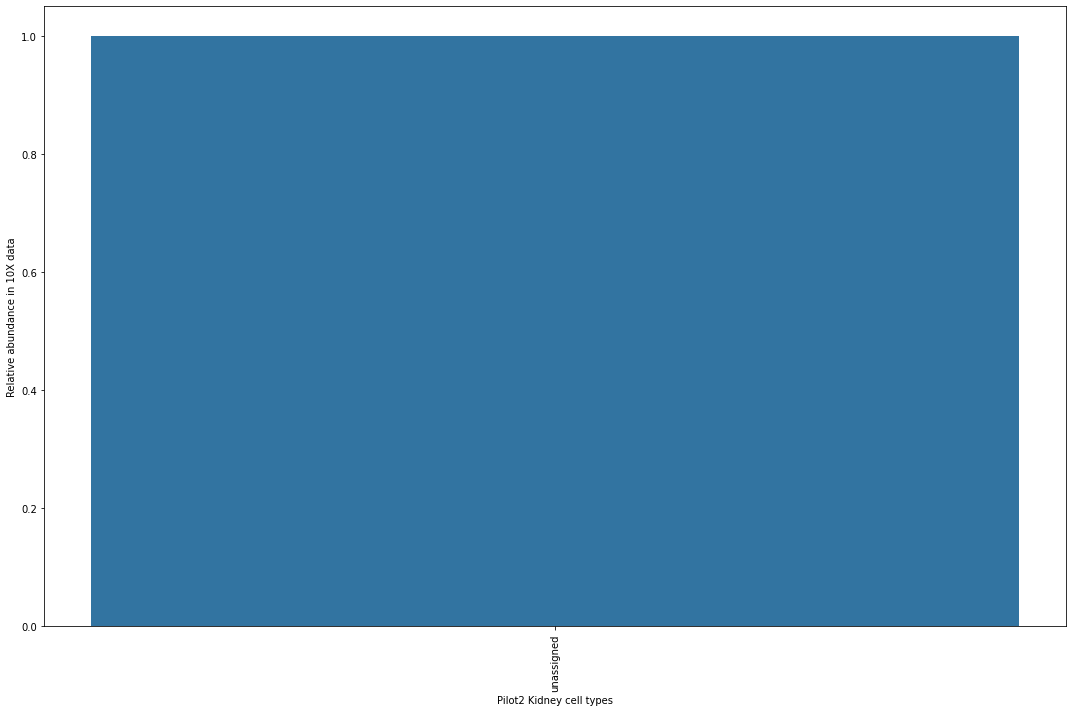

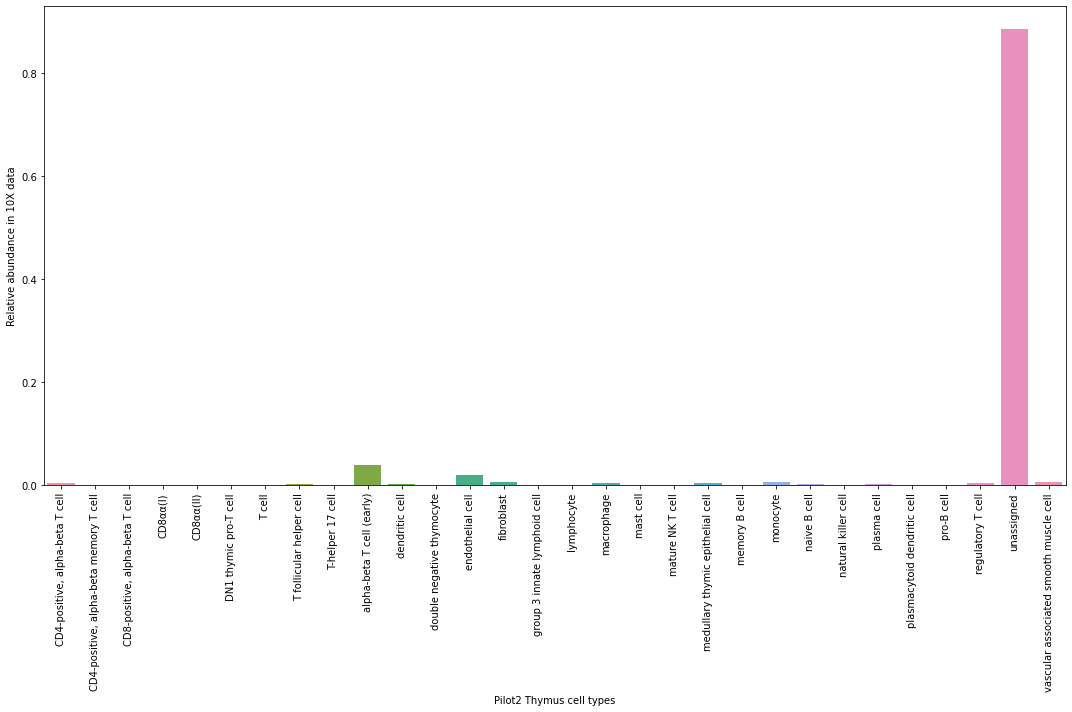

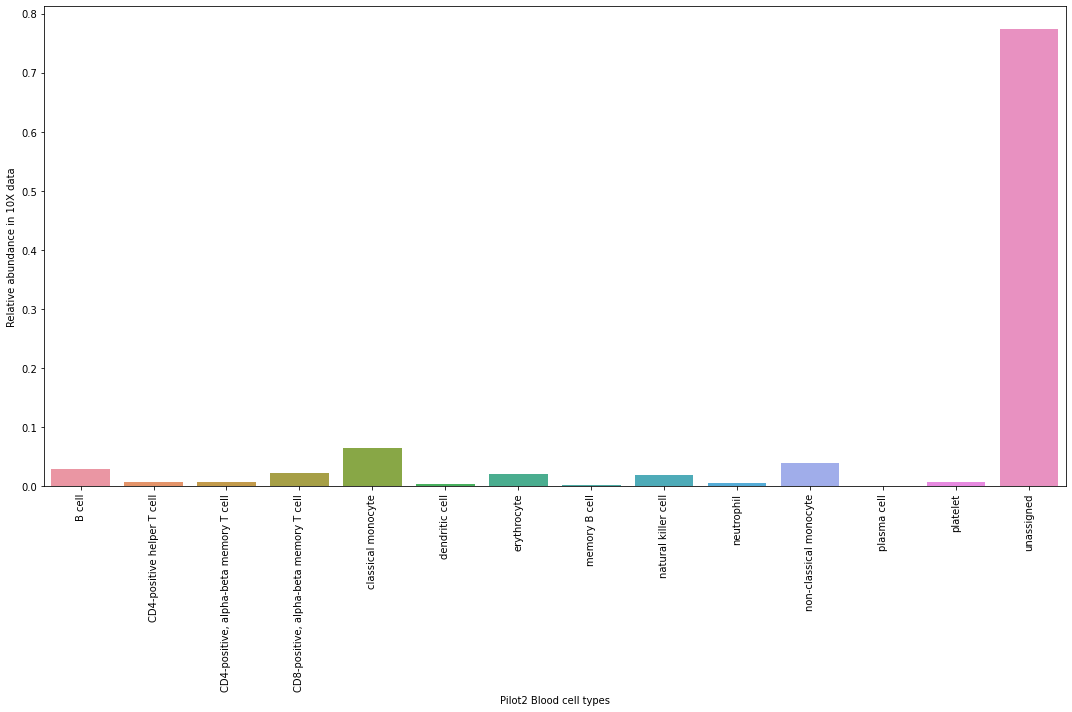

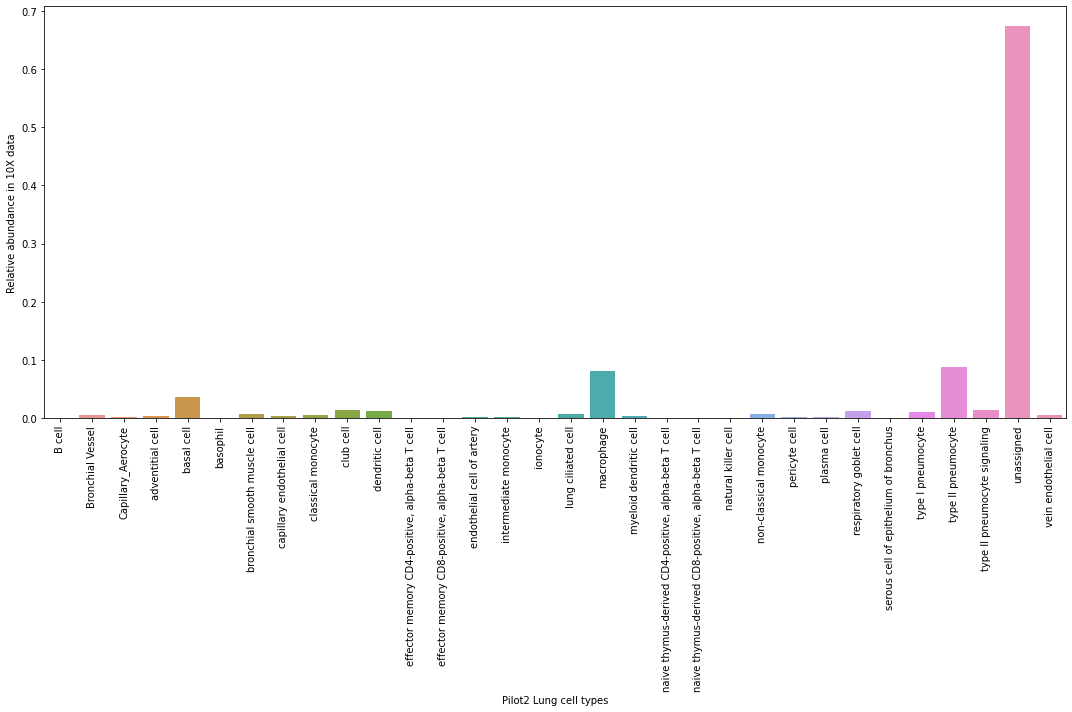

In [126]:
for p in [tsp1,tsp2]:
    
    p = p[p.obs['method']=='10X'].copy()
    
    for t in list(set(p.obs['tissue'])):
        print(t)
        tiss = p[p.obs['tissue'] == t].copy()
        
        try:
            
            aux = tiss.obs.groupby(['scANVI Prediction By Organ'])['sample'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['sample'] = aux['sample']/aux['sample'].sum()
            
            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'sample',x = 'scANVI Prediction By Organ', ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel="Pilot1 "+t+' cell types', ylabel='Relative abundance in 10X data');
            plt.tight_layout()
            plt.savefig("./cell_fractions/Pilot1_"+t+'.pdf')
            

        except:
            aux = tiss.obs.groupby(['cell_ontology_class'])['sample'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['sample'] = aux['sample']/aux['sample'].sum()
            
            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'sample',x = 'cell_ontology_class', ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel="Pilot2 "+t+' cell types', ylabel='Relative abundance in 10X data');
            plt.tight_layout()
            plt.savefig("./cell_fractions/Pilot2_"+t+'.pdf')

        
    